In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

plt.style.use("default")

In [13]:
df = pd.read_csv('./globalterrorismdb_0617dist.csv', encoding='latin1')

C:\Users\Mark\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Part 1 - EDA and Time Indexed Graph

Map of Attackes per Year <br>
https://public.tableau.com/profile/mark2209#!/vizhome/GTD-Project4/AttacksperYear

In [14]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
df.dtypes

eventid                 int64
iyear                   int64
imonth                  int64
iday                    int64
approxdate             object
extended                int64
resolution             object
country                 int64
country_txt            object
region                  int64
region_txt             object
provstate              object
city                   object
latitude              float64
longitude             float64
specificity           float64
vicinity                int64
location               object
summary                object
crit1                   int64
crit2                   int64
crit3                   int64
doubtterr               int64
alternative           float64
alternative_txt        object
multiple                int64
success                 int64
suicide                 int64
attacktype1             int64
attacktype1_txt        object
                       ...   
propextent            float64
propextent_txt         object
propvalue 

In [15]:
df['attacktype1'].value_counts()

3    83073
2    40223
1    18402
6    10233
7     9581
9     6425
8      913
5      902
4      598
Name: attacktype1, dtype: int64

In [14]:
df.shape

(170350, 135)

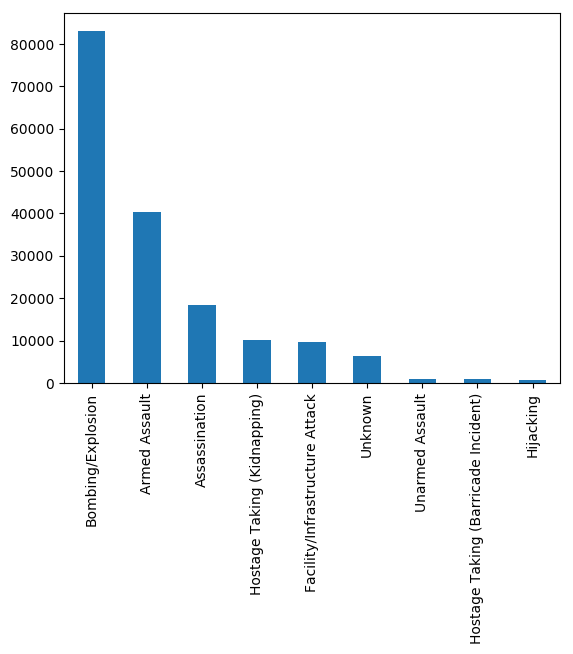

In [40]:
df['attacktype1_txt'].value_counts().plot.bar()

## Part 2

In [3]:
import pymc3 as pm

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\Mark\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\Users\Mark\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv impo

In [4]:
bomb = df[df['attacktype1_txt'] == 'Bombing/Explosion'].copy()

In [6]:
bomb['region'].value_counts()
# 10 = Middle East & North Africa
# 1 = North America

10    28314
6     19834
3      8977
8      8424
11     4930
5      4476
2      3239
9      2720
1      1528
4       327
7       231
12       73
Name: region, dtype: int64

In [7]:
pop = bomb[(bomb['region'] == 10) | (bomb['region'] == 1)]

In [8]:
# North America bombing history
pop[pop['region'] == 1]['iyear'].value_counts().sort_index()

1970    278
1971    143
1972     40
1973     22
1974     76
1975    133
1976     79
1977     92
1978     67
1979     44
1980     33
1981     42
1982     48
1983     22
1984     31
1985     27
1986     34
1987     19
1988     17
1989     17
1990     16
1991     13
1992      5
1994     19
1995     17
1996     19
1997     18
1998     12
1999      8
2000      6
2001      8
2002     20
2003      6
2004      1
2005      9
2006      5
2007      3
2008      9
2009      5
2010      9
2011      5
2012      8
2013      9
2014      5
2015     21
2016      8
Name: iyear, dtype: int64

In [9]:
# Middle East & North Africa bombing history
pop[pop['region'] == 10]['iyear'].value_counts().sort_index()

1970      14
1971      36
1972      23
1973      14
1974      27
1975      28
1976      37
1977     153
1978      73
1979     256
1980     221
1981     176
1982     182
1983     233
1984     160
1985      91
1986     115
1987      82
1988     121
1989     147
1990     137
1991     268
1992     253
1994     292
1995     176
1996     157
1997     178
1998     153
1999     170
2000     116
2001     144
2002     164
2003     183
2004     297
2005     489
2006     712
2007     948
2008    1131
2009    1066
2010    1003
2011     986
2012    1636
2013    2915
2014    4424
2015    3865
2016    4262
Name: iyear, dtype: int64

In [10]:
me_bomb = pop[(pop['region'] == 10) & (pop['iyear'] >= 2010)]

In [11]:
na_bomb = pop[(pop['region'] == 1) & (pop['iyear'] >= 2010)]

In [18]:
# Observed values for ME
me_bomb['iyear'].value_counts()

2014    4424
2016    4262
2015    3865
2013    2915
2012    1636
2010    1003
2011     986
Name: iyear, dtype: int64

In [23]:
# Observed values for NA
na_bomb['iyear'].value_counts()

2015    21
2013     9
2010     9
2016     8
2012     8
2014     5
2011     5
Name: iyear, dtype: int64

In [36]:
pop[(pop['region'] == 1)]['iyear'].value_counts().sort_index()

1970    278
1971    143
1972     40
1973     22
1974     76
1975    133
1976     79
1977     92
1978     67
1979     44
1980     33
1981     42
1982     48
1983     22
1984     31
1985     27
1986     34
1987     19
1988     17
1989     17
1990     16
1991     13
1992      5
1994     19
1995     17
1996     19
1997     18
1998     12
1999      8
2000      6
2001      8
2002     20
2003      6
2004      1
2005      9
2006      5
2007      3
2008      9
2009      5
2010      9
2011      5
2012      8
2013      9
2014      5
2015     21
2016      8
Name: iyear, dtype: int64

In [15]:
# prior would be global average prior to 2010
prior_mean = pop[(pop['iyear'] < 2010) & (pop['iyear'] >= 2000)]['iyear'].mean()
prior_std = pop[(pop['iyear'] < 2010) & (pop['iyear'] >= 2000)]['iyear'].std()
print(prior_mean, prior_std)

2006.480082675686 2.312317538065832


In [56]:
with pm.Model() as model:
    na_mean = pm.Normal('na_mean', prior_mean, sd=prior_std)
    me_mean = pm.Normal('me_mean', prior_mean, sd=prior_std)
    
    na_std = pm.Uniform('na_std', lower=1, upper=6000)
    me_std = pm.Uniform('me_std', lower=1, upper=6000)
    
    na_years = pm.Normal('na_years', mu=na_mean, sd=na_std, observed=list(na_bomb['iyear'].value_counts()))
    me_years = pm.Normal('me_years', mu=me_mean, sd=me_std, observed=list(me_bomb['iyear'].value_counts()))
    
    mean_delta = pm.Deterministic('mean_delta', me_mean - na_mean)
    std_delta = pm.Deterministic('std_delta', me_std - na_std)
    effect_size = pm.Deterministic('effect_size', mean_delta / np.sqrt((me_std**2 + na_std**2)/2.))

In [57]:
with model:
    step = pm.NUTS()
    start = pm.find_MAP()
    trace = pm.sample(4000, start=start, step=step, njobs=4)

C:\Users\Mark\Anaconda3\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
logp = -145.52, ||grad|| = 0.0066847: 100%|███████████████████████████████████████████| 14/14 [00:00<00:00, 317.98it/s]
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [me_std_interval__, na_std_interval__, me_mean, na_mean]
The acceptance probability does not match the target. It is 0.9112894473134499, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8802640785854061, but should be close to 0.8. Try to increase the number of tuning steps.


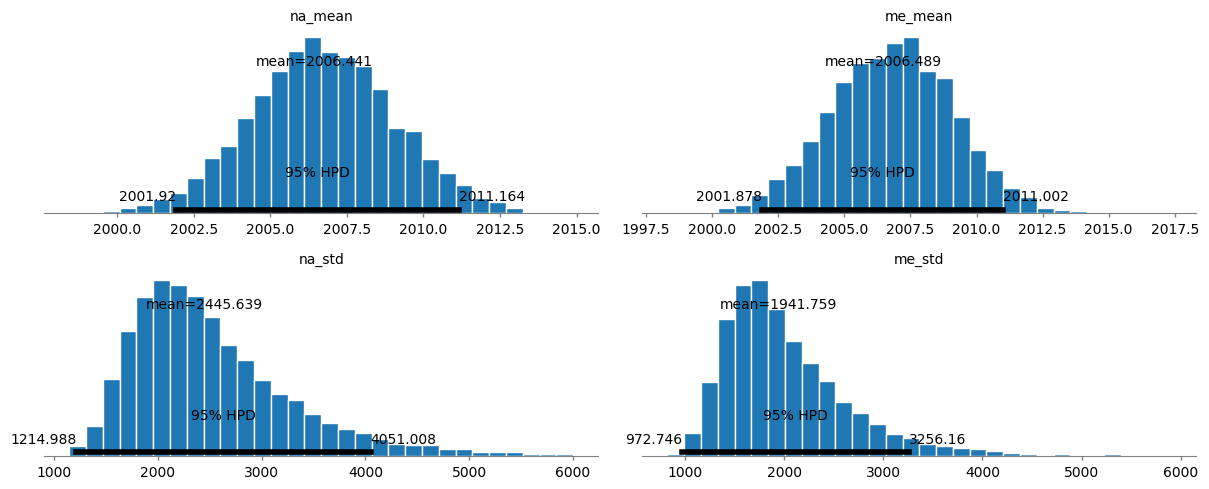

In [58]:
plt.style.use("default")
pm.plot_posterior(trace[2000:], varnames=['na_mean', 'me_mean', 'na_std', 'me_std']);

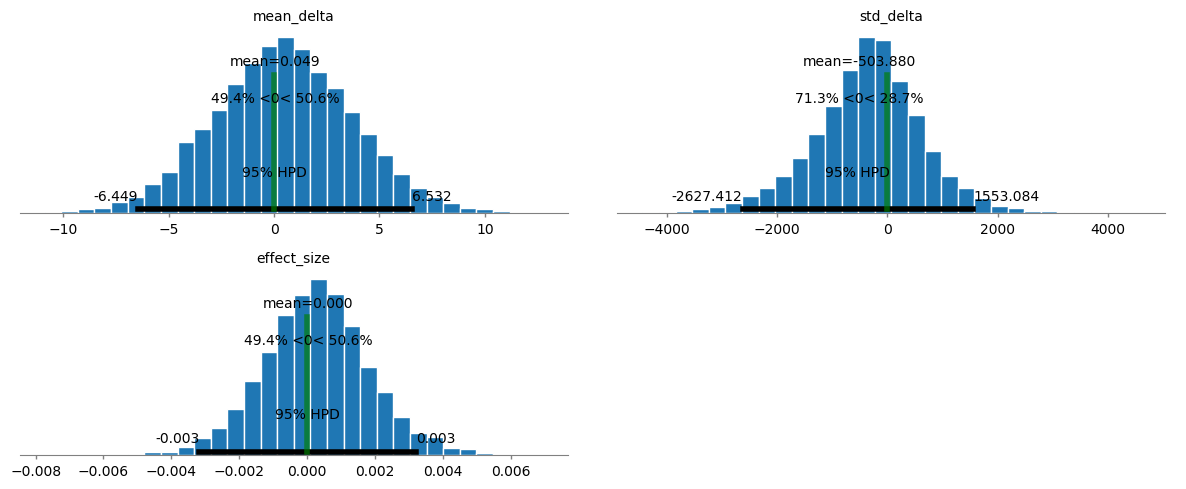

In [60]:
pm.plot_posterior(trace[2000:], varnames=['mean_delta','std_delta','effect_size'], ref_val=0);

## Part 3

Develop a methodology to impute the number of bombings in 1993. <br>
Using linear regression since there is a general tred of increasing number of bombings per year. Linear regression also allows us to control for inconsistency in variables such as reporting.

In [46]:
bomb = df[df['attacktype1_txt'] == 'Bombing/Explosion'].copy()

In [82]:
reg_df = pd.DataFrame()
reg_df['year'] = bomb['iyear'].value_counts().index
reg_df['count'] = bomb['iyear'].value_counts().values

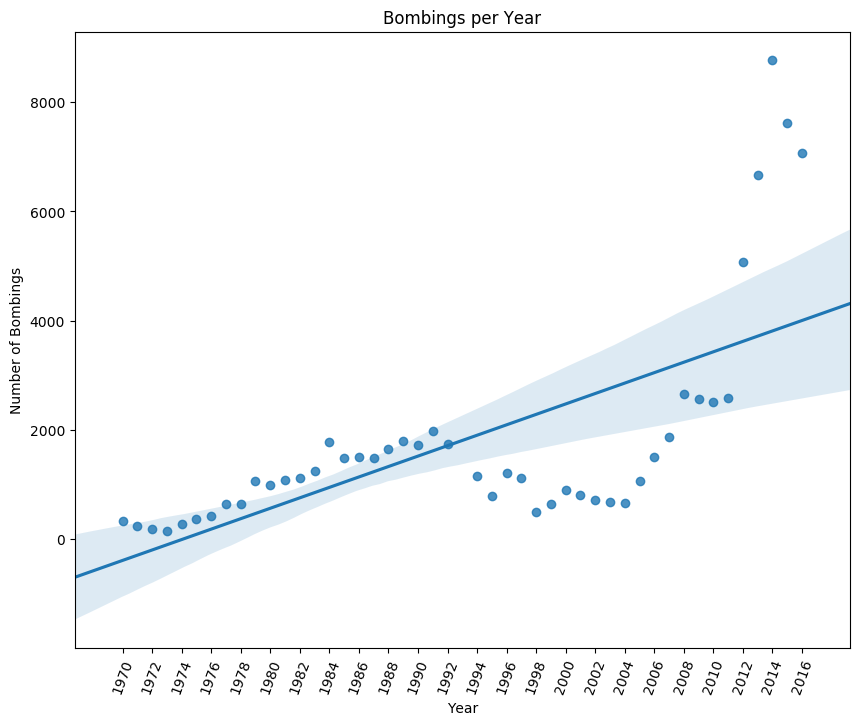

In [196]:
plt.figure(figsize=(10,8))
sns.regplot(reg_df['year'], reg_df['count'], )
plt.title("Bombings per Year")
plt.ylabel("Number of Bombings")
plt.xlabel("Year")
plt.xticks(np.arange(min(reg_df['year']), max(reg_df['year'])+2, 2), rotation=70);

In [49]:
from sklearn.linear_model import LinearRegression

In [168]:
y = reg_df['count']
X = reg_df['year'].values.reshape(-1,1)

In [170]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [174]:
lr.predict([[1993]])

array([ 1805.93478261])

In [193]:
lr.intercept_

-188424.85511100831

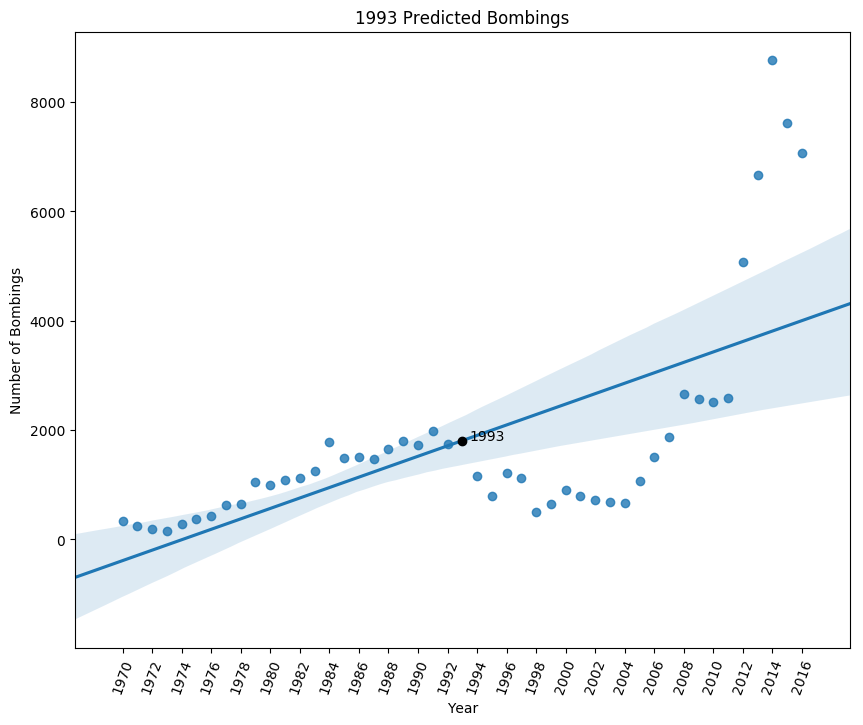

In [189]:
plt.figure(figsize=(10,8))
sns.regplot(reg_df['year'], reg_df['count'])
plt.plot(1993, 1805, marker='o', linestyle='-', color='k')
plt.text(1993.5, 1805, "1993")
plt.title("1993 Predicted Bombings")
plt.ylabel("Number of Bombings")
plt.xlabel("Year")
plt.xticks(np.arange(min(reg_df['year']), max(reg_df['year'])+2, 2), rotation=70);